In [ ]:
#Setup and Load data

In [12]:
# pip install --upgrade tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [39 lines of output]
  Traceback (most recent call last):
    File "C:\Users\kruta\AppData\Roaming\Python\Python39\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = parse_requirement(requirement_string)
    File "C:\Users\kruta\AppData\Roaming\Python\Python39\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
    File "C:\Users\kruta\AppData\Roaming\Python\Python39\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
    File "C:\Users\kruta\AppData\Roaming\Python\Python39\site-packages\setuptools\_vendor\packaging\_parser.py", line 126, in _parse_requirement_details
      marker = _parse_requirement_marker(
    File "C:\

In [1]:
#1.1 install dependencies and Setup
!pip install tensorflow tenserflow-gpu opencv-python matplotlib

ERROR: Could not find a version that satisfies the requirement tenserflow-gpu (from versions: none)
ERROR: No matching distribution found for tenserflow-gpu


In [2]:
# !pip list

In [1]:
import tensorflow as tf
import os

C:\Users\kruta\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\kruta\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\kruta\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
os.path.join("data", "happy")

'data\\happy'

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [4]:
#Avoid OOM errors by setting GPU memory consumtion growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
#remove dodgy umages
import cv2
import imghdr
import matplotlib.pyplot as plt


In [6]:
data_dir = "C:\\Users\\kruta\\Downloads\\CNN image classification\\data"
data_dir

'C:\\Users\\kruta\\Downloads\\CNN image classification\\data'

In [7]:
# os.listdir(os.path.join(data_dir, 'happy'))

In [8]:
image_exts = ['jpeg', 'jpg', 'bmp',  'png']
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [9]:
image_exts[3]

'png'

In [10]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [11]:
img = cv2.imread(os.path.join('data', 'happy', 'dv2051009.jpg'))
img.shape

(3621, 4828, 3)

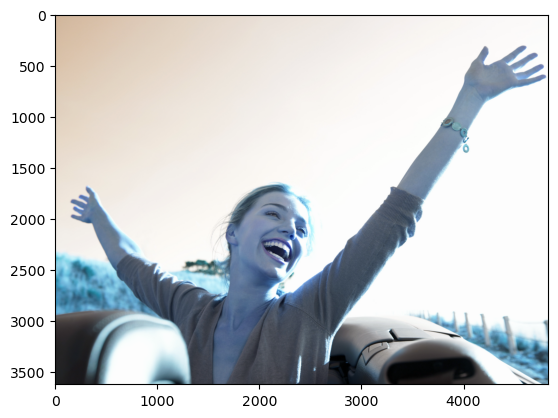

In [12]:
plt.imshow(img)

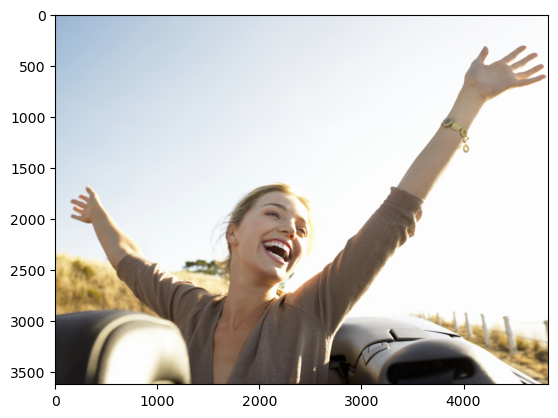

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.formate(image_path))

In [15]:
#load data
tf.data.Dataset??

In [16]:
data = tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory

In [17]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128,128))

Found 301 files belonging to 2 classes.


In [18]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 301 files belonging to 2 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
#Get another batch from the iterator 
batch = data_iterator.next()

In [21]:
#Images represented as many arrays
batch[0].shape

(32, 256, 256, 3)

In [22]:
#Class 1 - Sad
#Class 0 - Happy
batch[1]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1])

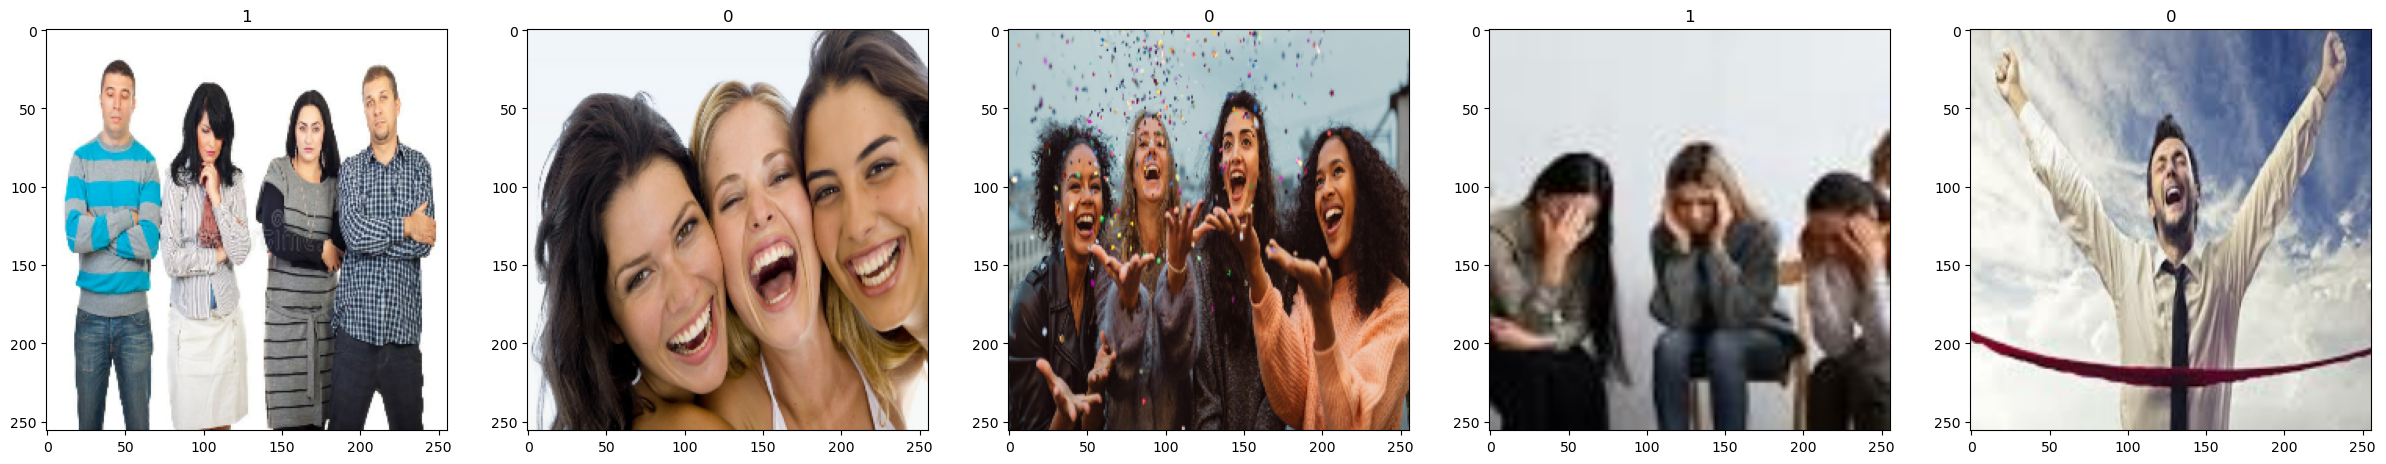

In [23]:
fig, ax = plt.subplots(ncols=5, figsize=(30, 30))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
# # code for understanding..(enumerate)
# list = ['dog','car','buffelo','jacon']

# for x, y in enumerate (list):
#     print(x)
#     print(y)

In [25]:
scaled = batch[0] / 255
scaled.max()

1.0

In [26]:
# 2. Preprocess Data

In [27]:
#2.1 Scale data
data = data.map(lambda x, y: (x/255, y))

In [28]:
scaled_iterator = data.as_numpy_iterator()

In [29]:
scaled_iterator.next()

(array([[[[9.05882359e-01, 8.39215696e-01, 6.35294139e-01],
          [9.05790448e-01, 8.39123785e-01, 6.35202229e-01],
          [9.01960790e-01, 8.35294127e-01, 6.31372571e-01],
          ...,
          [5.72549045e-01, 6.66666687e-01, 5.72549045e-01],
          [5.72549045e-01, 6.66666687e-01, 5.72549045e-01],
          [5.72549045e-01, 6.66666687e-01, 5.72549045e-01]],
 
         [[9.05882359e-01, 8.39215696e-01, 6.35294139e-01],
          [9.05790448e-01, 8.39123785e-01, 6.35202229e-01],
          [9.01960790e-01, 8.35294127e-01, 6.31372571e-01],
          ...,
          [5.72549045e-01, 6.66666687e-01, 5.72549045e-01],
          [5.72549045e-01, 6.66666687e-01, 5.72549045e-01],
          [5.72549045e-01, 6.66666687e-01, 5.72549045e-01]],
 
         [[9.05882359e-01, 8.39215696e-01, 6.35294139e-01],
          [9.05790448e-01, 8.39123785e-01, 6.35202229e-01],
          [9.01960790e-01, 8.35294127e-01, 6.31372571e-01],
          ...,
          [5.74096203e-01, 6.68213844e-01, 5.7409

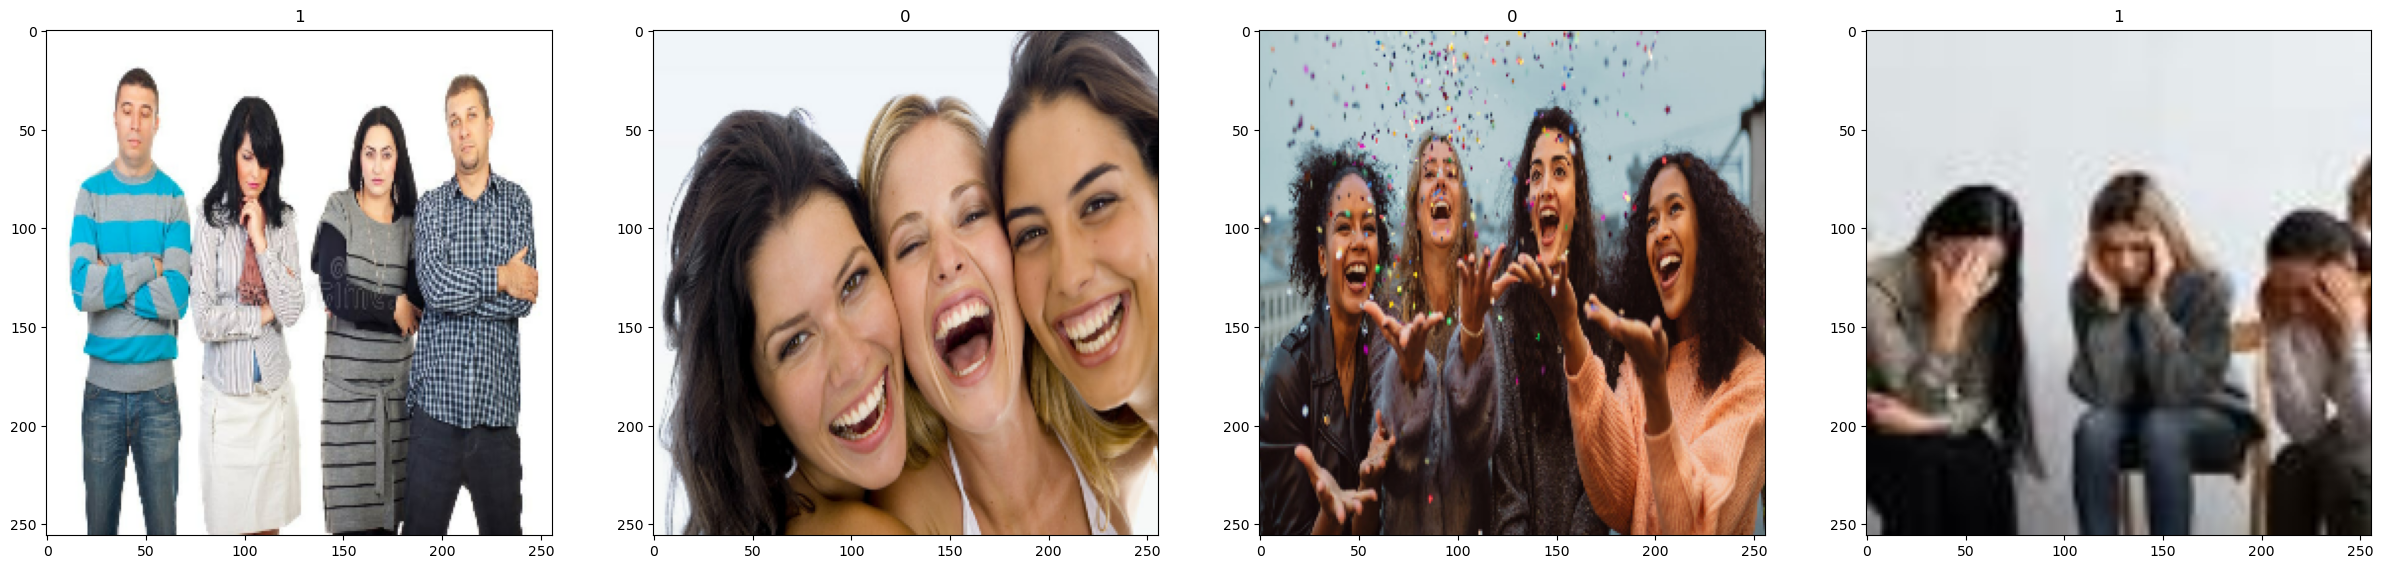

In [30]:
fig, ax = plt.subplots(ncols=4, figsize=(30, 30))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## split data

In [31]:

len(data)

10

In [32]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

print(train_size)
print(test_size)
print(val_size)

7
1
2


In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
len(test)

1

## Deep Model


In [35]:
#3.1 build deep learning model
from tensorflow.keras.models import Sequential
from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dense, Flatten, Dropout

In [36]:
model = Sequential()

In [37]:
Conv2D??

In [38]:
#-------------------------------------------------------
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## Train 

In [41]:
logdir = 'logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 7s 714ms/step - loss: 1.0599 - accuracy: 0.4598 - val_loss: 0.6953 - val_accuracy: 0.3906
Epoch 2/20
7/7 [==============================] - 5s 673ms/step - loss: 0.6622 - accuracy: 0.5268 - val_loss: 0.6454 - val_accuracy: 0.6875
Epoch 3/20
7/7 [==============================] - 5s 645ms/step - loss: 0.6108 - accuracy: 0.7009 - val_loss: 0.5912 - val_accuracy: 0.6562
Epoch 4/20
7/7 [==============================] - 5s 646ms/step - loss: 0.5669 - accuracy: 0.7098 - val_loss: 0.4650 - val_accuracy: 0.7500
Epoch 5/20
7/7 [==============================] - 5s 645ms/step - loss: 0.5615 - accuracy: 0.7188 - val_loss: 0.4876 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 5s 651ms/step - loss: 0.4975 - accuracy: 0.7589 - val_loss: 0.4416 - val_accuracy: 0.7656
Epoch 7/20
7/7 [==============================] - 5s 645ms/step - loss: 0.4146 - accuracy: 0.8259 - val_loss: 0.5004 - val_accuracy: 0.7344
Epoch 8/20
7/7 [====

In [44]:
hist.history

{'loss': [1.0599191188812256,
  0.662202000617981,
  0.6107624769210815,
  0.5668745040893555,
  0.5615404844284058,
  0.4974900186061859,
  0.4146091639995575,
  0.41305795311927795,
  0.3615741729736328,
  0.3430822193622589,
  0.3017784059047699,
  0.22718577086925507,
  0.21650592982769012,
  0.20934653282165527,
  0.2582398056983948,
  0.23701174557209015,
  0.1597128063440323,
  0.1300121545791626,
  0.09834878146648407,
  0.07819005101919174],
 'accuracy': [0.4598214328289032,
  0.5267857313156128,
  0.7008928656578064,
  0.7098214030265808,
  0.71875,
  0.7589285969734192,
  0.8258928656578064,
  0.8125,
  0.84375,
  0.8616071343421936,
  0.8660714030265808,
  0.8973214030265808,
  0.9107142686843872,
  0.9241071343421936,
  0.8616071343421936,
  0.8705357313156128,
  0.9508928656578064,
  0.9553571343421936,
  0.9732142686843872,
  0.9732142686843872],
 'val_loss': [0.695348858833313,
  0.6453559994697571,
  0.5911611914634705,
  0.4649540185928345,
  0.487621009349823,
  0.44

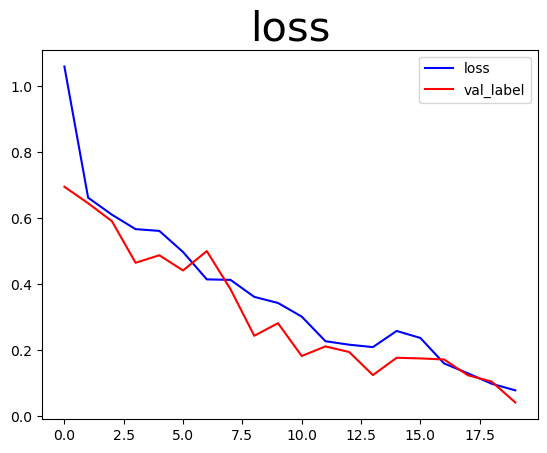

In [45]:
# fig = plt.figure()
plt.plot(hist.history['loss'], color = 'blue', label= 'loss')
plt.plot(hist.history['val_loss'], color = 'red', label= 'val_label')
plt.title('loss', fontsize = 30)
plt.legend(loc = 'upper right')
plt.show()

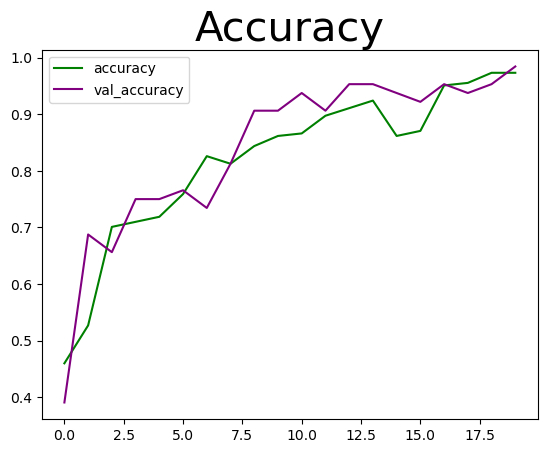

In [46]:
plt.plot(hist.history['accuracy'], color = 'green', label= 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'purple', label= 'val_accuracy')
plt.title('Accuracy', fontsize = 30)
plt.legend(loc = 'upper left')
plt.show()

## Evaluate Performace

In [47]:
#Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [48]:
pre= Precision()
re= Recall()
acc= BinaryAccuracy()

In [49]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat= model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 121ms/step


In [50]:
print("precision:" , pre.result().numpy())
print("recall:" , re.result().numpy())
print("accuracy:" , acc.result().numpy())


precision: 1.0
recall: 1.0
accuracy: 1.0


In [51]:
#Test

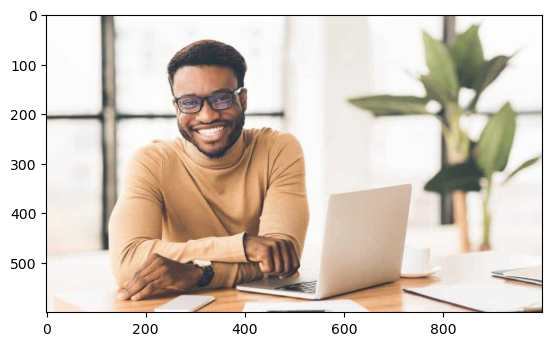

In [86]:
import cv2
img = cv2.imread('Happytest3.jpg')
# img = cv2.imread('sadtest.jpg')

# plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

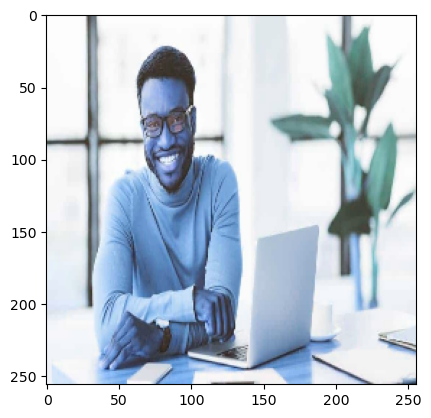

In [87]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
resize.shape

TensorShape([256, 256, 3])

In [89]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [90]:
# import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [91]:
yhat

array([[0.2679255]], dtype=float32)

In [92]:
if yhat > 0.5:
    print("Sad person")
else:
    print("Happy person")

Happy person


## Save Model

In [93]:
#save the model
from tensorflow.keras.models import load_model

In [94]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [96]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [99]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 37ms/step


In [101]:
if yhat_new > 0.5:
    print("Sad Person")
else:
    print("Happy Person")

Happy Person


In [ ]:
#just for information 
#CNN CODE

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#LSTM CODE
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()

model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(10, 5)))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(32, return_sequences=False, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#RNN CODE
from keras.models import Sequentia
from keras.layers import SimpleRNN, Dense

model = Sequential()

model.add(SimpleRNN(64, return_sequences=True, activation='relu', input_shape=(10, 5)))
model.add(SimpleRNN(32, return_sequences=False, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#ANN
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation='relu', input_dim=10))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
#GRU
from keras.models import Sequential
from keras.layers import GRU, Dense

model = Sequential()

model.add(GRU(64, return_sequences=True, activation='relu', input_shape=(10, 5)))
model.add(GRU(32, return_sequences=False, activation='relu'))

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
### 1. Convolutional Neural Network (CNN):

- **Use Case:** Best suited for image-related tasks.
- **Characteristics:**
  - Designed to capture spatial hierarchies and patterns in 2D data like images.
  - Employs convolutional and pooling layers to learn local features.
- **When to Use:**
  - Image classification.
  - Object detection.
  - Image segmentation.
  - Any task involving spatial relationships in data.

### 2. Long Short-Term Memory (LSTM):

- **Use Case:** Ideal for sequence data, time series, and natural language processing (NLP).
- **Characteristics:**
  - Specifically designed to handle sequences and capture long-term dependencies.
  - Memory cells allow the model to remember information over long sequences.
- **When to Use:**
  - Time series prediction.
  - Sentiment analysis.
  - Speech recognition.
  - Language translation.
  
### 3. Recurrent Neural Network (RNN):

- **Use Case:** Similar to LSTM, suitable for sequence data.
- **Characteristics:**
  - Processes sequences by maintaining hidden state information.
  - Can struggle with capturing long-term dependencies compared to LSTMs.
- **When to Use:**
  - Simple sequence processing tasks.
  - Shorter sequences where long-term dependencies are not crucial.

### 4. Artificial Neural Network (ANN):

- **Use Case:** General-purpose, suitable for a variety of tasks.
- **Characteristics:**
  - Fully connected layers with no specific structure for handling spatial or sequential data.
  - Basic architecture used for generic tasks.
- **When to Use:**
  - Tabular data.
  - Basic regression or classification tasks.
  - Tasks without clear spatial or sequential patterns.

### 5. Gated Recurrent Unit (GRU):

- **Use Case:** Similar to LSTM, suitable for sequence data.
- **Characteristics:**
  - Similar to LSTM but with a simplified architecture.
  - Effective for capturing dependencies in sequential data.
- **When to Use:**
  - Time series analysis.
  - NLP tasks.
  - Applications where a balance between performance and simplicity is needed.

### General Guidelines:

- **Experimentation:** Try different architectures and observe performance on your specific task.
  
- **Data Characteristics:** Consider the nature of your data, such as whether it's spatial (images), sequential (time series or text), or tabular.

- **Task Complexity:** Choose a model complexity that matches the complexity of your task. Start with simpler models and increase complexity if needed.

- **Computational Resources:** Be mindful of the computational resources available. Deeper models often require more resources.

- **Overfitting:** Watch out for overfitting, especially with deeper architectures. Use techniques like regularization and dropout to mitigate overfitting.

In practice, it's common to experiment with different architectures and iterate based on the observed performance on validation data. The choice of the model is often an empirical process that involves tuning and experimentation.